# 01 - Signals, Systems, and Sequences
Lecture 01 - 13 September 2021

The first lecture consists mostly of definitions and reminders. These are usually boring and rather cumbersome but are nevertheless needed.

Let's start with our first definition: signals.

## Signals

A signal is a MAP from time to some space:
\begin{align*}
    x\colon\ &\ t\longrightarrow y\\
    &\mathcal{R}\mapsto\mathcal{R}
\end{align*}

It is possible to restrict the domain and the codomain to $\mathcal{Z} \subset \mathcal{R}$ so that we have four types of maps:

<!-- I've generated these tables with the help of https://www.tablesgenerator.com/html_tables 
Trust me, you don't want to deal with tables by hand. -->
|   FROM \ TO   	|    $\mathcal{R}$    	|       $\mathcal{Z}$      	|
|:-------------:	|:-------------------:	|:------------------------:	|
| $\mathcal{R}$ 	|        ANALOG       	|         NOT USED         	|
| $\mathcal{Z}$ 	| DIGITAL<br>(theory) 	| DIGITAL<br>(experiments) 	|


## SYSTEM

Similarly, systems are MAPs between signals

|   FROM \ TO   	|             ANALOG                	|            Digital        	|
|:-------------:	|:----------------------------:      	|:----------------------------:	|
|     ANALOG     	|        Analog System       	        | Analog to Digital Converter<br>(ADC) |
|     DIGITAL   	| Digital to Analog converter<br>(DAC) 	| Digital system; numeric<br>system; processor |


## SEQUENCES

Sequences are maps from integer numbers to real or integer numbers:

\begin{align*}
    y\colon\ n&\longrightarrow y[n]\\
    \mathcal{Z}&\longmapsto \mathcal{R} \textit{ or } \mathcal{Z}
\end{align*}

Two remarkable sequences are the **Delta / Impulse sequence** and the **Step Sequence**.

### Delta sequence

The delta sequency is defined in analogy to the diract delta and the Kronecker delta:

\begin{align*}
    \delta[n] = \delta_{n,0} = \left\{\begin{array}{lr}
        1 \text{ if } n=0\\
        0 \text{ otherwise}
        \end{array}\right.
\end{align*}

The analogy is straightforward:

\begin{align*}
    x(t) &= \int_{-\infty}^{+\infty} x(\tau) \delta (t-\tau) d\tau\\
    x[n] &= \sum_{n_0 = -\infty}^{+\infty}x[x_0]\delta [n-n_0] 
\end{align*}

### Step Sequence

Similarly, the step sequence is defined in analogy to the Heaviside theta:

\begin{align*}
    U[n] = \left\{\begin{array}{lr}
        1 \text{ if } n\geq0\\
        0 \text{ otherwise}
        \end{array}\right.
\end{align*}

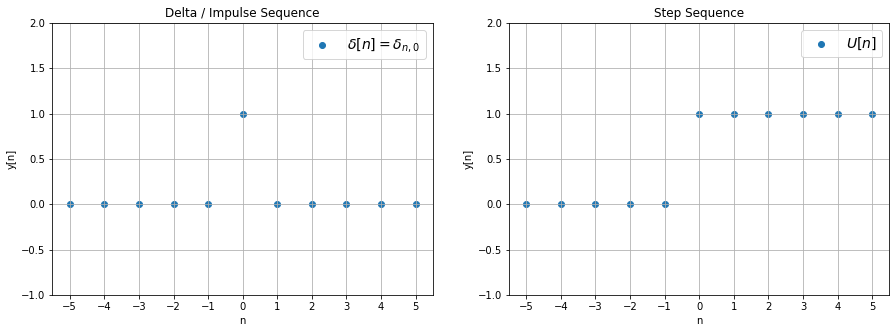

Left: Plot of the delta;
Right: Plot of the step sequence.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-5, 6, 1)
delta = np.zeros(t.shape); delta[ t.shape[0]//2] = 1
heavi = np.heaviside(t, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.title.set_text('Delta / Impulse Sequence')
ax1.scatter(t, delta, marker='o', label=r"$\delta[n]=\delta_{n,0}$")
ax1.set_xlabel('n'); ax1.set_ylabel('y[n]')
ax1.grid(True); ax1.legend(prop={'size': 14})
ax1.set_xticks(t)
ax1.set_ylim((-1, 2))

ax2.title.set_text('Step Sequence')
ax2.scatter(t, heavi, marker='o', label=r"$U[n]$")
ax2.set_xlabel('n'); ax2.set_ylabel('y[n]')
ax2.grid(True); ax2.legend(prop={'size': 14})
ax2.set_xticks(t)
ax2.set_ylim((-1, 2))

plt.show()
print("Left: Plot of the delta;\nRight: Plot of the step sequence.")

A sequence can be delayed or anticipated:
- Delayed sequence: $y[n] = x[n-n_0],\ n_0>0 \in \mathcal{Z}$;
- Anticipated sequence: $y[n] = x[n+n_0],\ n_0>0 \in \mathcal{Z}$.

These two operations are essential as they allow us to write all series as a sum of deltas with proper coefficients:
\begin{equation*}
x[n] = \sum_{n_0 = -\infty}^{+\infty}x[n_0]\ \delta[n-n_0] = (x \ast \delta)[n]
\end{equation*}
that is a discrete convolution between a sequence and a delta.

### Periodic Sequences
A sequence $x[n]$ is said to be periodic of period $T$ if and only if (iff) $x[n-T] = x[n]\ \forall n \in \mathcal{Z}$.

### Energy
Finally, the energy of a system is defined as
\begin{equation*}
\mathcal{E}(x[n]) = \sum_{n=-\infty}^{+\infty}\left| x[n] \right|^2
\end{equation*}
where the modulus was introduced to take care of signals $\mathcal{Z}\rightarrow \mathcal{C}$.

## Linear and Time-Invariant (LTI) Systems

As one can immagine, LTI systems are systems that are both linear and time invariant. Let's consider a system:
\begin{align*}
    \mathcal{S}\colon\ \{x[n]\}&\longrightarrow \{y[n]\}\\
    x[n]&\longmapsto y[n]=\mathcal{S}(x[n])
\end{align*}

### Linear Systems

A system is linear iff given $y_1[n]=\mathcal{S}(x_1[n])$ and $y_2[n]=\mathcal{S}(x_2[n])$ the following relation holds:


\begin{equation*}
\mathcal{S}(\alpha x_1[n] + \beta x_2[n]) = \alpha \mathcal{S}(x_1[n]) + \beta \mathcal{S}(x_2[n]) = \alpha y_1[n]+
\beta y_2[n]
\end{equation*}

for every $\alpha, \beta \in \mathcal{R}$.

```{warning}
Saying "a linear system is one for which the _superposition principle_ holds" is a tautology because the superposition itself is defined via linearity.
```

One remarkable consequence of linearity is:
\begin{equation*}
\mathcal{S}(x[n]) = \mathcal{S}\left(\sum_{k=-\infty}^{+\infty} x[k] \delta[n-k]\right) = \sum_{k=-\infty}^{+\infty} x[k] \mathcal{S}(\delta[n-k]) 
\end{equation*}

that is: **a linear system is fully characterized by its impulse response** $h[n]=\mathcal{S}(\delta [n])$.

<!-- Linear systems are one of the most important classes of systems because even nonlinear systems can be linearized with apposite techniques. -->

### Time-Invariant Systems

A system is said to be time invariant iff
\begin{equation*}
    y[n] = \mathcal{S}(x[n]) \implies y_1[n] = \mathcal{x[n-n_0]} = y[n-n_0]
\end{equation*}

that is: "to the same inputs correspond the same outputs without regard on when the input was sent".